Multilayer Perceptron’s (MLPs)

In [2]:
#import required libs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the MLP model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for iris species
])

C:\Users\SOMRAJ BHARADWAJ\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5355 - loss: 0.9538 - val_accuracy: 0.7083 - val_loss: 0.8223
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6332 - loss: 0.8592 - val_accuracy: 0.7083 - val_loss: 0.7455
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6383 - loss: 0.7860 - val_accuracy: 0.7500 - val_loss: 0.6763
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7205 - loss: 0.7055 - val_accuracy: 0.7500 - val_loss: 0.6222
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7489 - loss: 0.6474 - val_accuracy: 0.7917 - val_loss: 0.5754
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8135 - loss: 0.5902 - val_accuracy: 0.7917 - val_loss: 0.5358
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8142 - loss: 0.5656 - val_accuracy: 0.7917 - val_loss: 0.5097
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8064 - loss: 0.5126 - val_accuracy: 0.8333 - 

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9667 - loss: 0.0643
Test accuracy: 0.97


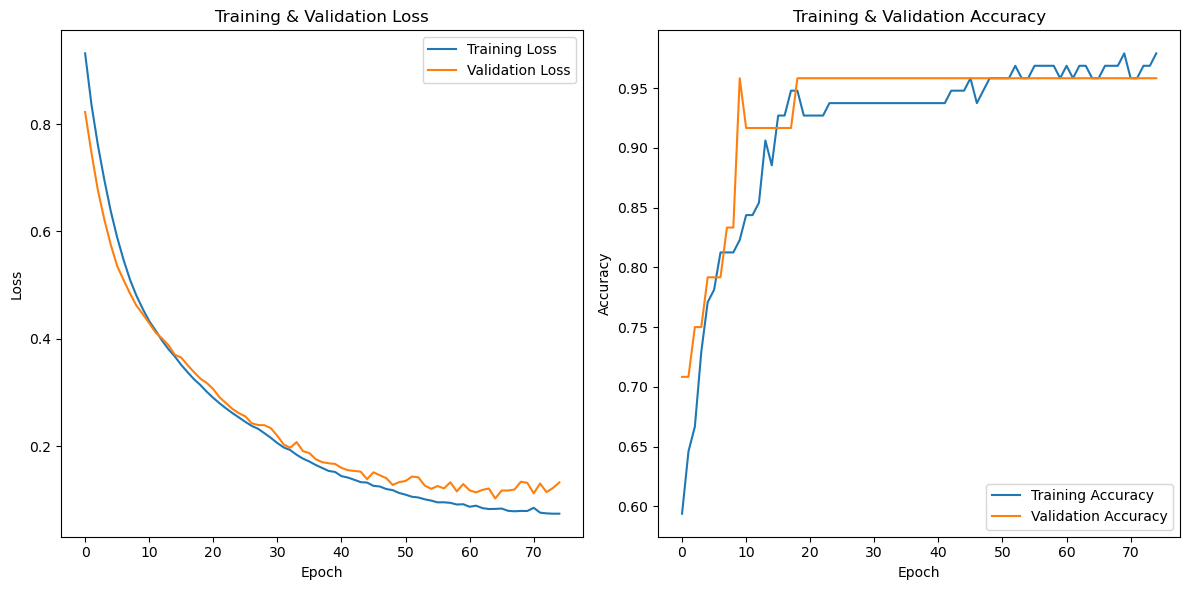

In [11]:
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()